## Mod5-Final Project Submission


* Thoa Shook 
* Student pace: Oncampus -full time
* Scheduled project review date/time: 09/04/19
* Instructor name: Howard Smith
* Blog post URL: TBA


#### 1. Business Understanding

Work provides financial security, personal identity, and gives us an opportunity to make meaningful contributions to our communities. However,the workplace is also one of the key environments that affects our mental health and well being. There are many risk factors that may be present in the workplace such as inadequate health and safety polices, low control over one's area of work, poor communication and management practices, workload, inflexible working hours, etc. Absenteeism and disability costs have increased in the workplace due to mental illness. Early identification and intervention will have significant impact on preventing underperformance, excessive absenteeism, and other related problems.


#### 2. Data Understanding
Data was obtained from Kaggle: https://www.kaggle.com/osmi/mental-health-in-tech-survey

The purpose of this research is to identify the primary pre-screening risk factors that contribute to mental illness in technology workplaces and recommend ways to address and improve methods to deal with those issues.  

#### 3. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
# import warnings
# warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('MentalHealthInTechSurvey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

#### 3.1 Find Missing Values

In [3]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

#### 3.2 Drop columns with excessive missing values (NaN)

In [4]:
# Because missing values of 'state'is 40.9% and of 'comments' is 86.97%, decide to drop these two
# Country is dropped since we are only interested in the US
# Drop 'work_interfere' because missing value is 20.97%
df = df.drop(columns = ['Country','Timestamp','state', 'comments', 'work_interfere'], axis = 1)

#### 3.3 Replace NaN values in features with mean value

In [5]:
# Replace 'nan' values in dataframe with the category most occur in this feature
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

#### 3.4 Examine Age Feature

In [7]:
df.Age.value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

#### 3.4.1 Use a min and max cut off in Age & fill the out of bound with mean value
#### 3.4.2 Plot Age data distribution after cleaning

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5, 1.0, 'Age Distribution')

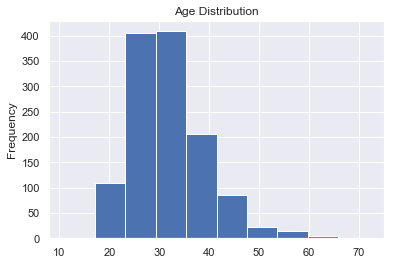

In [8]:
# There are unusual number for 'Age' such as negative numbers,or very large numbers
# Replace them with age's average
# and plot Age data distribution
df.Age[df['Age'] < 11] = 32
df.Age[df['Age'] > 72] = 32
# examine Age data distribution after cleaning 
df.Age.plot(kind='hist').set_title('Age Distribution')

#### 3.5 Examine Gender Feature

In [9]:
# examine Gender feature
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Man                                                 2
Cis Male                                            2
Female (trans)                                      2
Female                                              2
maile                                               1
All                                                 1
Femake                                              1
Male (CIS)                  

#### 3.5.1 Group variations of male & female into two groups Male (M) & Female (F) 
#### 3.5.2  Plot Gender data distribution after cleaning

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


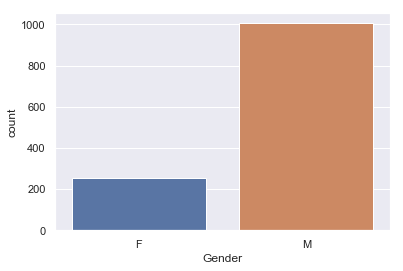

In [10]:
# There are many variations of male and female,and some are non-conforming gender (not many)
# Decide to group gender into F (female) and M (Male) groups
# If 'Gender' contains'f' or'w': assign them to 'F'

df.Gender[df.Gender.apply(lambda x: 'f' in str.lower(x))] = 'F'
df.Gender[df.Gender.apply(lambda x: 'w' in str.lower(x))] = 'F'

# Else: assign them to 'M'
df.Gender[df.Gender != 'F'] = 'M'

# plot Gender data distribution - examine 'Gender'distribution after cleaning process
sns.countplot(x='Gender', data=df)

In [51]:
df['Gender'].value_counts()

1    1006
0     253
Name: Gender, dtype: int64

#### 4. Exploratory Data Analysis (EDA)

#### 4.1 Data Encoding

In [13]:
# Use LabelEncoder to convert all categorical data into ordinal data such as Likert Scale
# Order doesn't matter in the features below
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
# Create the for loop to navigate through the column list and LabelEncode each of the features 
columns_list = df.columns    
for feature in columns_list:
    df[feature] = lb_make.fit_transform(df[feature])   

In [14]:
# Order is also important here, preserve order in the company size, cannot use LabelEncoder for this feature
# due to order constraint
df.loc[df['no_employees']=='1-5',['no_employees']]=1
df.loc[df['no_employees']=='6-25',['no_employees']]=2
df.loc[df['no_employees']=='26-100',['no_employees']]=3
df.loc[df['no_employees']=='100-500',['no_employees']]=4
df.loc[df['no_employees']=='500-1000',['no_employees']]=5
df.loc[df['no_employees']=='More than 1000',['no_employees']]=6

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


#### 4.1 Quick look at data after encoding

In [15]:
df.head()

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,20,0,0,0,1,4,0,1,2,1,...,2,2,1,1,1,2,1,0,2,0
1,27,1,0,0,0,5,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,15,1,0,0,0,4,0,1,1,0,...,0,1,1,1,2,2,2,2,1,0
3,14,1,0,1,1,2,0,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,14,1,0,0,0,1,1,1,2,0,...,0,0,1,1,1,2,2,2,0,0


#### 4.2 Plot data distribution

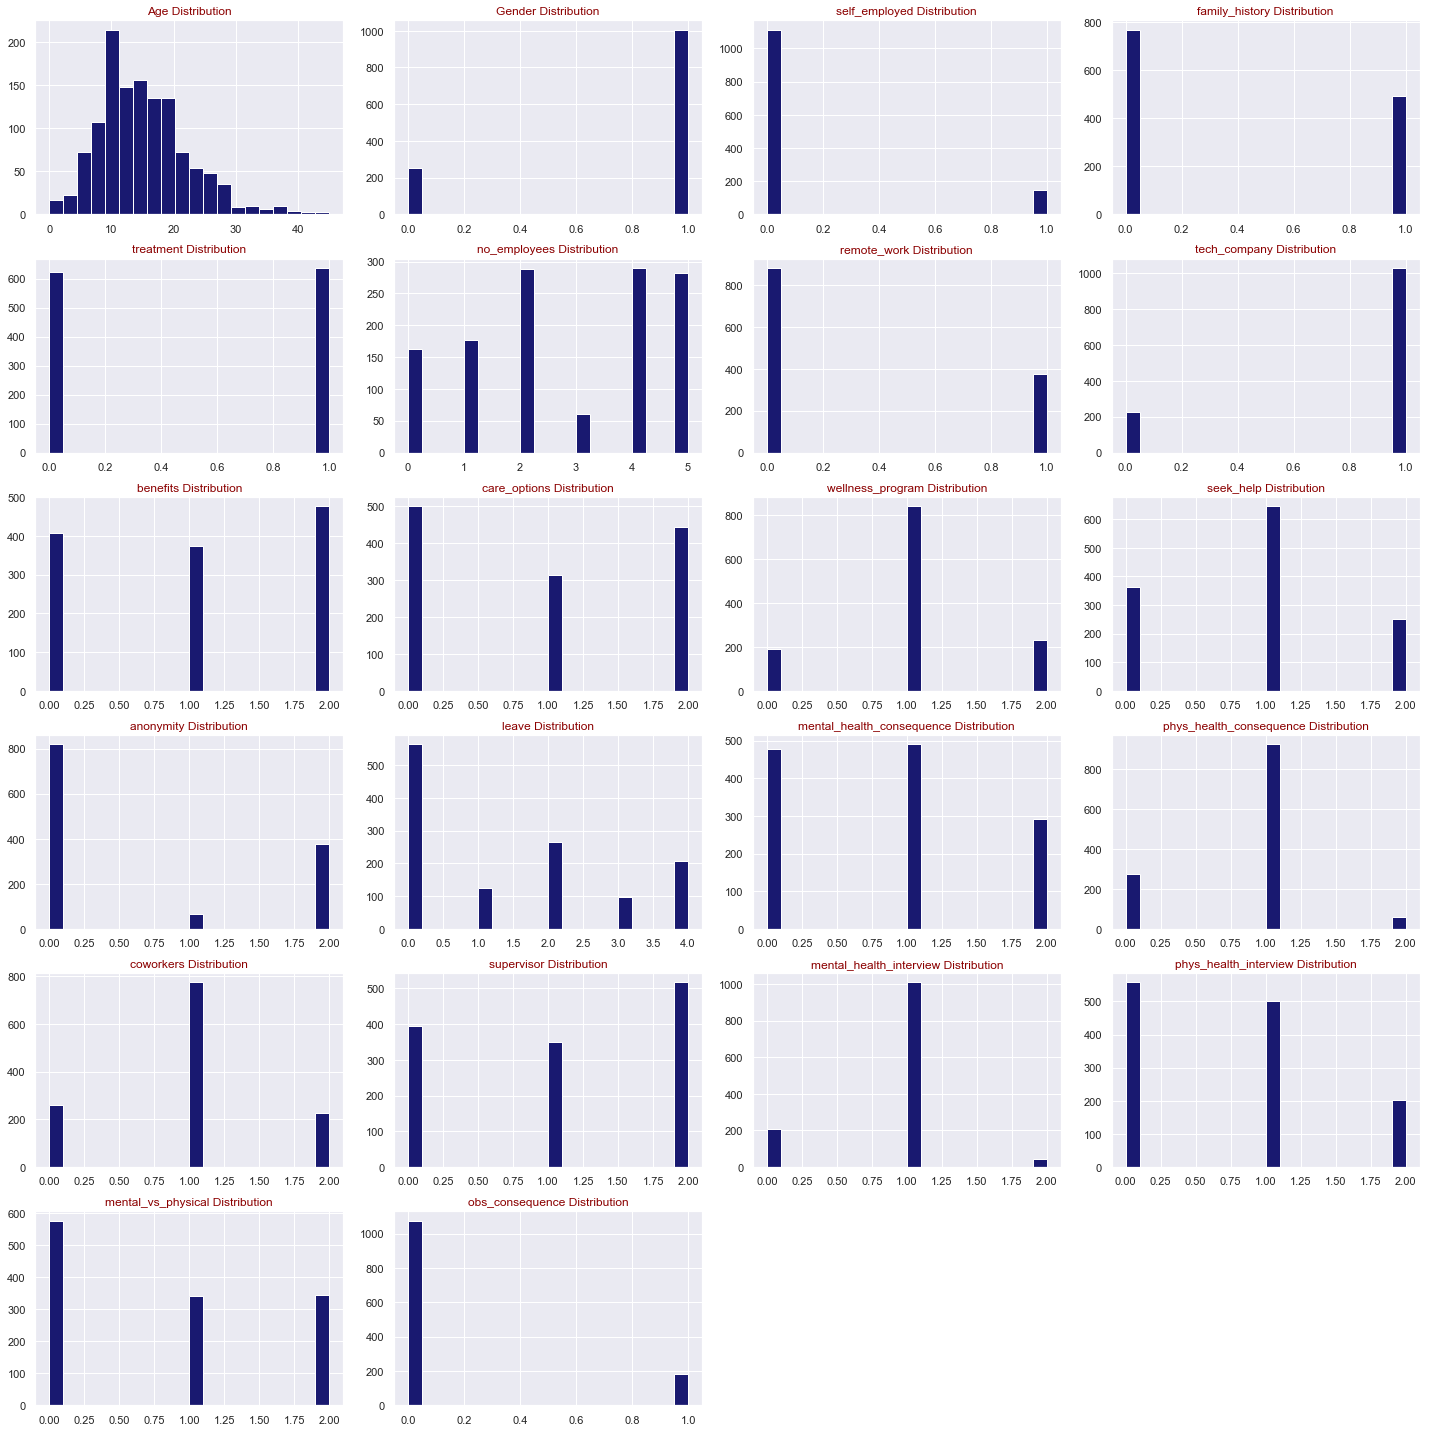

In [16]:
# plot features data distribution
fig=plt.figure(figsize=(20,20))
columns_list = df.columns 
# Create for loop to navigate through the column list
for i, feature in enumerate(columns_list):
    ax=fig.add_subplot(6,4,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
    ax.set_title(feature+" Distribution", color='DarkRed')
        
fig.tight_layout()  
plt.show()

#### 4.3 Heat map correlation among predictors

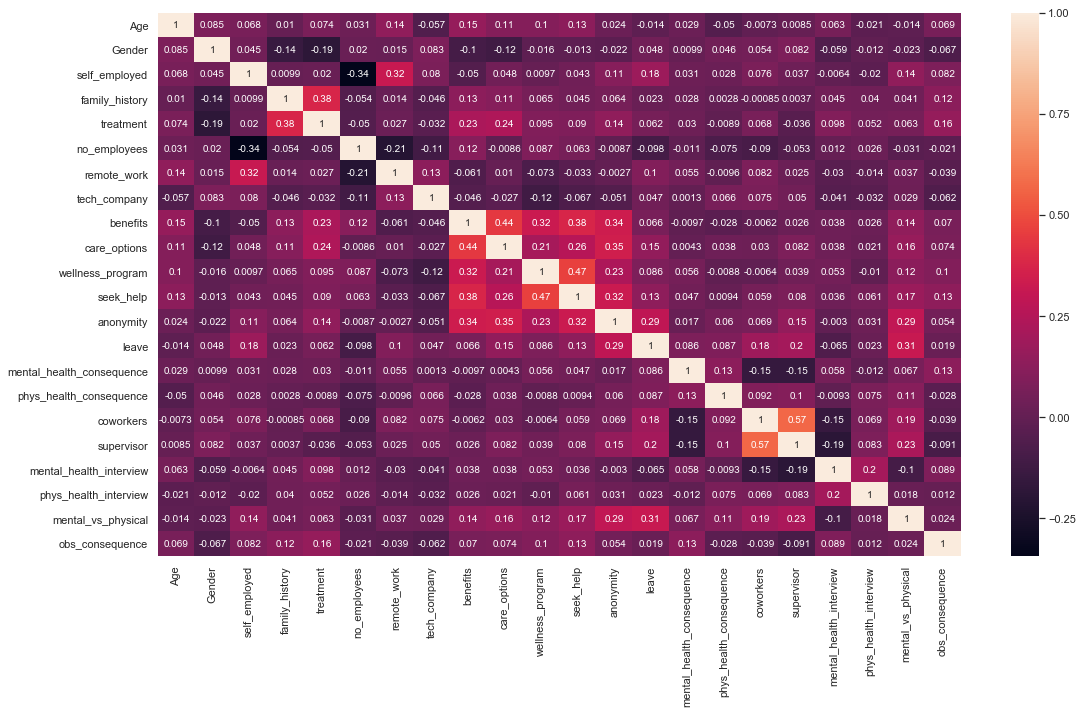

In [65]:
fig = plt.gcf()
fig.set_size_inches(18, 10)
sns.heatmap(df.corr(), annot = True)
plt.show()

Some notes about multicollinearuty: 
Coefficient between coworkers and supervisor is very high = 0.57
Coefficient between wellness program and seek help is also high = 0.47
There is also a relationship between benefits and care-option: coefficient = 0.44
Coefficient between family history and treatment = 0.38
Coefficient between leave and mental mental vs physical = 0.31
Coefficient between remote work and self employed = 0.32


##### 4.4 Gender vs  Treatment
##### Question: Men vs women, who are likely to seek mental treatment?

Text(0.5, 1.0, 'Gender vs Treatment')

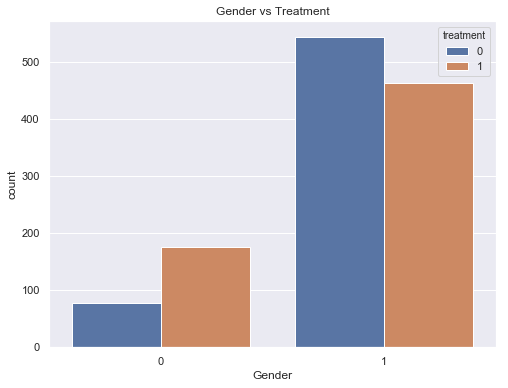

In [61]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'Gender', hue='treatment')
plt.title('Gender vs Treatment')

In [44]:
print(len(df[df['Gender']== 0]))
print(len(df[df['Gender'] ==1]))
# we have 253 female and 1006 male in our dataset

253
1006


In [56]:
# find the number of male, female with and without treatment respectively:
num_female_treatment = len(df[(df['Gender']== 0) & (df['treatment']==1)])
num_males_treatment = len(df[(df['Gender']== 1) & (df['treatment']==1)])
num_female_no_treatment = len(df[(df['Gender']== 0) & (df['treatment']== 0)])
num_males_no_treatment = len(df[(df['Gender']== 1) & (df['treatment']==0)])
print(num_female_treatment,num_males_treatment, num_female_no_treatment,num_males_no_treatment)

175 462 78 544


In [59]:
p_female_seek_treatment = num_female_treatment/len(df[df['Gender']== 0])
p_males_seek_treatment = num_males_treatment/len(df[df['Gender'] ==1])
print('The probability of Female seeking treatment:', p_female_seek_treatment)
print('The probability of Male seeking treatment:', p_males_seek_treatment)

The probability of Female seeking treatment: 0.691699604743083
The probability of Male seeking treatment: 0.4592445328031809


##### Answer:  ****Women are likely to seek mental treatment than males

#### 5. Modeling

In [22]:
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics


#### 5.1 Logistic Regression

In [23]:
# Define predictors X & target variable y
# Timestamp data was insignificant to the model (assessment above).Therefore, exclude it from the model.
X = df.drop('treatment', axis =1)
y = df['treatment']

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Create model and train the training set
log_reg = LogisticRegression(C=1.0, class_weight ='balanced', penalty ='l2')
model_log = log_reg.fit(X_train, y_train)
print(model_log)

# Test the model using test set
y_pred = log_reg.predict(X_test)

# print the results
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Logistic Regression Precision:",metrics.precision_score(y_test, y_pred))
print("Logistic Regression Recall:",metrics.recall_score(y_test, y_pred))
print("Logistic Regression f1_score:",metrics.f1_score(y_test, y_pred))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Logistic Regression Accuracy: 0.7380952380952381
Logistic Regression Precision: 0.776595744680851
Logistic Regression Recall: 0.7192118226600985
Logistic Regression f1_score: 0.7468030690537085


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###### 5.2 Support Vector Machine 

In [26]:
from sklearn.svm import SVC
# Define predictors X and target variablae y
X = df.drop(['treatment'], axis =1)
y = df['treatment']
# Split training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 22)

# Build, train, and test the model
svm = SVC(kernel ='linear')
svm.fit(X_train, y_train)
y_pred =svm.predict(X_test)

# Print the results
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("SVM Precision:",metrics.precision_score(y_test, y_pred))
print("SVM Recall:",metrics.recall_score(y_test, y_pred))
print("SVM f1_score:",metrics.f1_score(y_test, y_pred))

SVM Accuracy: 0.7063492063492064
SVM Precision: 0.7348066298342542
SVM Recall: 0.6785714285714286
SVM f1_score: 0.7055702917771883


#### 5.3 Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Define target variable and predictors
X = df.drop(['treatment'], axis =1)
y = df['treatment']
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 22)

# Build decision Tree Model, train the data, and test the qualitative metrics
dt_clf= DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(X_train,y_train) 
y_pred = dt_clf.predict(X_test)

print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Decision Tree Precision:",metrics.precision_score(y_test, y_pred))
print("Decision Tree Recall:",metrics.recall_score(y_test, y_pred))
print("Decision Tree f1_score:",metrics.f1_score(y_test, y_pred))

Decision Tree Accuracy: 0.6296296296296297
Decision Tree Precision: 0.648936170212766
Decision Tree Recall: 0.6224489795918368
Decision Tree f1_score: 0.6354166666666666


#### 5.3.1 Probability for Seeking Treatment based on the Decision Tree Model

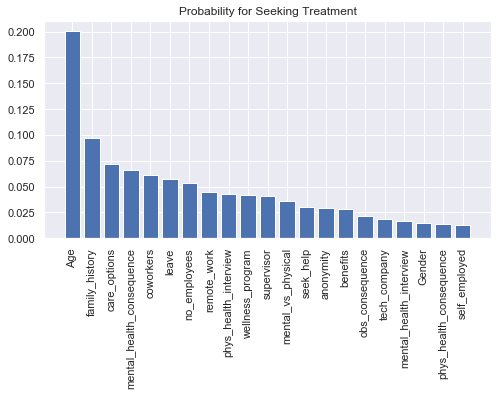

In [29]:
# assign variable impt_attributes to random forest classifier.feature_importances_
impt_attributes = dt_clf.feature_importances_
# Assign the list of X_train to variable feature_names
features =list(X_train)
# sort features in order of importances
ind = np.argsort(impt_attributes)[::-1]
# Rearrange feature names in order of sorted feature importances
names = [features[i] for i in ind]
plt.figure(figsize=(8,4))
plt.title("Probability for Seeking Treatment")
plt.bar(range(X_train.shape[1]), impt_attributes[ind])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

#### 5.4 Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from sklearn import tree

X = df.drop(['treatment'], axis =1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 22)

rfm = RandomForestClassifier(n_estimators= 500, oob_score=True,max_leaf_nodes= 7,class_weight='balanced', n_jobs= 1)
rfm.fit(X_train, y_train)

y_pred = rfm.predict(X_test)

print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Random Forest Precision:",metrics.precision_score(y_test, y_pred))
print("Random Forest Recall:",metrics.recall_score(y_test, y_pred))
print("Random Forest f1_score:",metrics.f1_score(y_test, y_pred))

Random Forest Accuracy: 0.7037037037037037
Random Forest Precision: 0.7079207920792079
Random Forest Recall: 0.7295918367346939
Random Forest f1_score: 0.7185929648241206


#### 5.4.1 Finding the Optimal Parameter using GridSearchCV to Improve Random Forest Model Performance

In [31]:
# Using GridSearch to improve on Model
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

random_classifier = RandomForestClassifier()

parameters = { 'max_features':np.arange(5,10),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}

random_grid = GridSearchCV(random_classifier, parameters, cv = 5)

random_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [32]:
random_grid.best_params_

{'max_features': 5, 'min_samples_leaf': 10, 'n_estimators': 500}

#### 5.4.2 Apply GridSearch Best Parameter to Random Forest Estimator

In [33]:
random_classifier = RandomForestClassifier()

parameters = { 'max_features':[5],'n_estimators':[500],'min_samples_leaf': [10]}

random_grid = GridSearchCV(random_classifier, parameters, cv = 5)

random_grid.fit(X_train, y_train)

y_pred = random_grid.predict(X_test)

print("Random GridSearchCV Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Random GridSearchCV Precision:",metrics.precision_score(y_test, y_pred))
print("Random GridSearchCV Recall:",metrics.recall_score(y_test, y_pred))
print("Random GridSearchCV f1_score:",metrics.f1_score(y_test, y_pred))

Random GridSearchCV Accuracy: 0.7063492063492064
Random GridSearchCV Precision: 0.7073170731707317
Random GridSearchCV Recall: 0.7397959183673469
Random GridSearchCV f1_score: 0.7231920199501247


#### 5.4.3 Probability for Seeking Treatment based on Random Forest Model

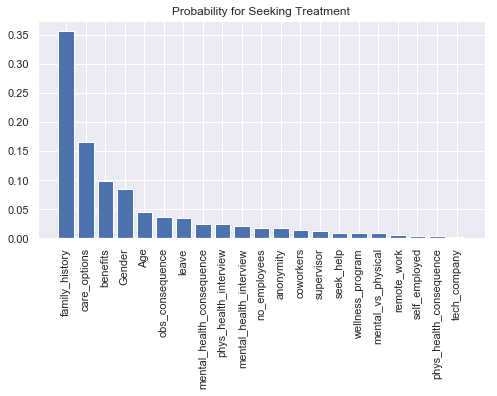

In [34]:
# assign variable impt_attributes to random forest classifier.feature_importances_
order_impt_attributes = rfm.feature_importances_
# Assign the list of X_train to variable feature_names
features =list(X_train)
# sort features in order of importances
ind = np.argsort(order_impt_attributes)[::-1]
# Rearrange feature names in order of sorted feature importances
names = [features[i] for i in ind]
plt.figure(figsize=(8,4))
plt.title("Probability for Seeking Treatment")
plt.bar(range(X_train.shape[1]), order_impt_attributes[ind])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()


#### 6. Model Comparison 

#### 6.1 Model Accuracy Comparison

Text(0.5, 1.0, 'Model Accuracy Comparison')

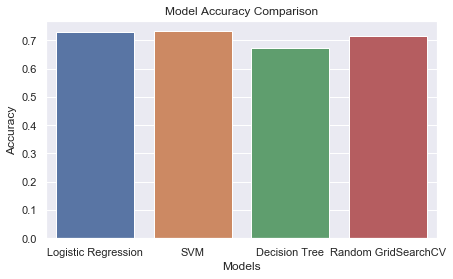

In [19]:
# Create two list of Models and their metric accuracy respectively
mod = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random GridSearchCV']
acc = [0.7300,0.7328 ,0.6746,0.7142]
# Create a new dataframe df_acc
dict = {'Models': mod, 'Accuracy': acc}     
df_acc = pd.DataFrame(dict) 
# plot our models vs accuracy    
fig,ax =plt.subplots(figsize=(7,4))
sns.barplot(x=df_acc['Models'], y= df_acc['Accuracy'])
plt.title("Model Accuracy Comparison")

#### 6.2 Model F1 Score Comparison

Text(0.5, 1.0, 'Model F1 Score Comparison')

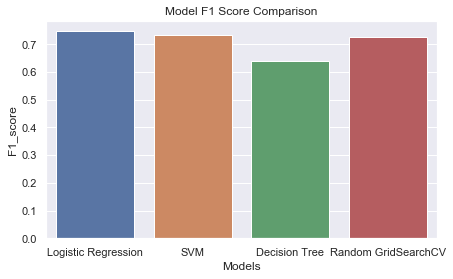

In [20]:
# Create two list of Models and their metric f1 scores respectively
mod = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random GridSearchCV']
f1_score = [0.7468,0.7328 ,0.6391,0.7245]
# create new data frame from these two lists
dict = {'Models': mod, 'F1_score': f1_score}     
df_f1_score = pd.DataFrame(dict) 
#plot models vs score    
fig,ax =plt.subplots(figsize=(7,4))
sns.barplot(x=df_f1_score['Models'],
               y= df_f1_score['F1_score'])
plt.title("Model F1 Score Comparison")

#### 6. Model Evaluation

After careful assessment of the four different models on the macro level, the predictive ability of each is virtually equal. i.e., All four models are separated by no more than four percentage points. The predictive accuracy values for each model ranges from 67.46% for the Decision Tree to 71.4% for the Random GridSearchCV, to 73% for Logistic Regression, to 73.3% for the SVM. The F1-score for the models are 68.7%, 73%, 73%, 72.3% respectively.
On the micro level, the SVM model is more accurate than the other models.

#### 7. Conclusions & Recommendations

**Based on our model the most important indicators for a mentally healthy and stable workforce are family history, available care options, employee healthcare benefits, and a leave plan to address family related mental health issues. Based on these facts, I make the following three recommendations:

1. Strongly recommend that the employer (Tech Company) use the screening survey as an initial indicator of potential mental issue. Employees that indicate previously identify mental health issue in their family or extended family should receive an indepth assessment.

2. Strongly recommend that the company retains mental health professionals and counselor on its staffs.

3. Strongly recommend that the company's healthcare benefits plan includes provisions for extensive non-gender specific mental healthcare and leave for employees and their family members without any age limitation.

